In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix,mean_absolute_error
from sklearn.decomposition import PCA


# Loading Dataset

In [42]:
data_file = '/media/amlan/Data/Thesis Data/Processed Data/kmeans_train_data'
df = pd.read_csv(data_file, index_col=0)
df = df.reset_index(drop=True)


df = df[df.Behavior != 'No observation']
df = df[df.VeDBA > 1e-6]
df.VeDBA  = np.log(df.VeDBA)
df = df.rename(columns={'VeDBA': 'Log VeDBA'})


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.reset_index(drop=True,inplace=True)
df.Behavior.value_counts()

Scrabbling                        2765
Foraging                          1564
Bipedal vigilance                  728
RunningGPS                         453
Self groom                         241
Reforage                           184
Haunch quadrupedal vigilance       138
Social                             114
Standing quadrupedal vigilance     105
Sitting vigilance                   88
Walking                             66
Processing                          61
Running                             24
Marking                              4
Others                               2
Name: Behavior, dtype: int64

# Grouping Behavior

In [43]:
df.loc[df['Behavior'] == 'Sitting vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Bipedal vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Haunch quadrupedal vigilance','Behavior'] = 'Vigilance'
df.loc[df['Behavior'] == 'Standing quadrupedal vigilance','Behavior'] = 'Vigilance'


df.loc[df['Behavior'] == 'Scrabbling','Behavior'] = 'Foraging' #Change
df.loc[df['Behavior'] == 'Walking','Behavior'] = 'Foraging'
df.loc[df['Behavior'] == 'Reforage','Behavior'] = 'Foraging'

df.loc[df['Behavior'] == 'Social','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Processing','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Self groom','Behavior'] = 'Others'
df.loc[df['Behavior'] == 'Marking','Behavior'] = 'Others'



for i in df.Behavior.unique():
    print(str(i) + ' Log VeDBA Mean: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].mean())
    print(  str(i) + ' Log VeDBA Var: ',df.loc[df['Behavior'] == str(i),'Log VeDBA'].var())
    print('\n')

Vigilance Log VeDBA Mean:  -2.7378824314451196
Vigilance Log VeDBA Var:  1.1818020809236944


Foraging Log VeDBA Mean:  -0.8467426351713869
Foraging Log VeDBA Var:  0.1644251505333215


Others Log VeDBA Mean:  -1.4438590138223286
Others Log VeDBA Var:  0.42137959117407653


Running Log VeDBA Mean:  0.2761489351493641
Running Log VeDBA Var:  0.10755632519987221


RunningGPS Log VeDBA Mean:  0.4018234325796363
RunningGPS Log VeDBA Var:  0.26985562216221576




In [44]:
df.loc[df['Behavior'] == 'Walking','Behavior'] = 'Foraging'
df.Behavior.value_counts()

Foraging      4579
Vigilance     1059
RunningGPS     453
Others         422
Running         24
Name: Behavior, dtype: int64

Text(0.5, 1.0, 'VeDBA Distribution Across Behavior')

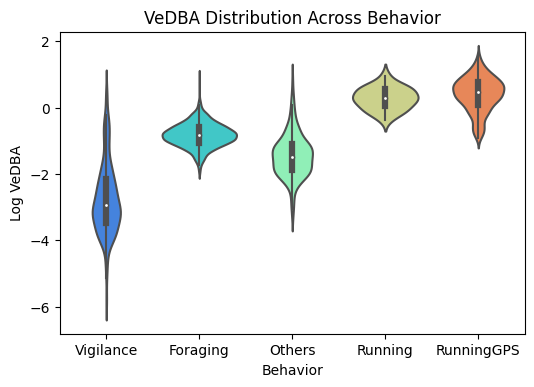

In [49]:
import seaborn as sns

#MAKE VIOLIN PLOTS


fig,ax = plt.subplots(dpi=100)
sns.violinplot(x='Behavior',y='Log VeDBA',data=df[['Behavior','Log VeDBA']], palette='rainbow',showfliers=True)
plt.title("VeDBA Distribution Across Behavior")

In [48]:
df = df[~((df['Behavior'] == 'Foraging') & (df['Log VeDBA']<-2))]

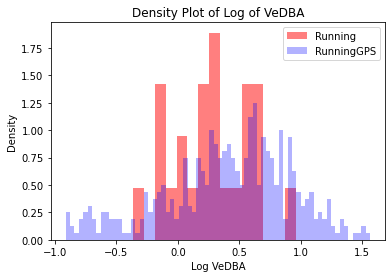

In [8]:
#plt.hist(np.log(df.loc[df['Behavior'] != 'Running','StdNorm']),bins=50,color='b',density='True')
plt.hist(df.loc[df['Behavior'] == 'Running','Log VeDBA'],bins=15,color='r',label='Running',density='True',alpha = .5) 
plt.hist(df.loc[df['Behavior'] == 'RunningGPS','Log VeDBA'],bins=70,color='b',label='RunningGPS',density='True',alpha=0.3)
plt.title('Density Plot of Log of VeDBA')
plt.xlabel('Log VeDBA')
plt.ylabel('Density')
plt.legend()
plt.show()
#df.loc[df['Behavior'] == 'RunningGPS','Behavior'] = 'Running'


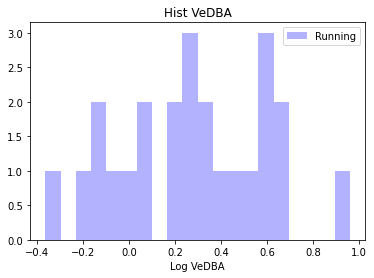

In [108]:
#plt.hist(np.log(df.loc[df['Behavior'] != 'Running','StdNorm']),bins=50,color='b',density='True')
#plt.hist(df.loc[df['Behavior'] == 'Running','Log VeDBA'],bins=70,color='r',label='Running',alpha = .5) 
plt.hist(df.loc[df['Behavior'] == 'Running','Log VeDBA'],bins=20,color='b',label='Running',alpha=0.3)
plt.title('Hist VeDBA')
plt.xlabel('Log VeDBA')

plt.legend()
plt.show()
#df.loc[df['Behavior'] == 'RunningGPS','Behavior'] = 'Running'

In [38]:
df.Behavior.value_counts()

Foraging      4570
Vigilance     1059
RunningGPS     453
Others         422
Running         24
Name: Behavior, dtype: int64

# Random Forest

<ipython-input-66-c02d7178ee4b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GPS_RUNNING.loc[:,'Behavior'] = 'Running'


Accuracy: 0.9641414141414142


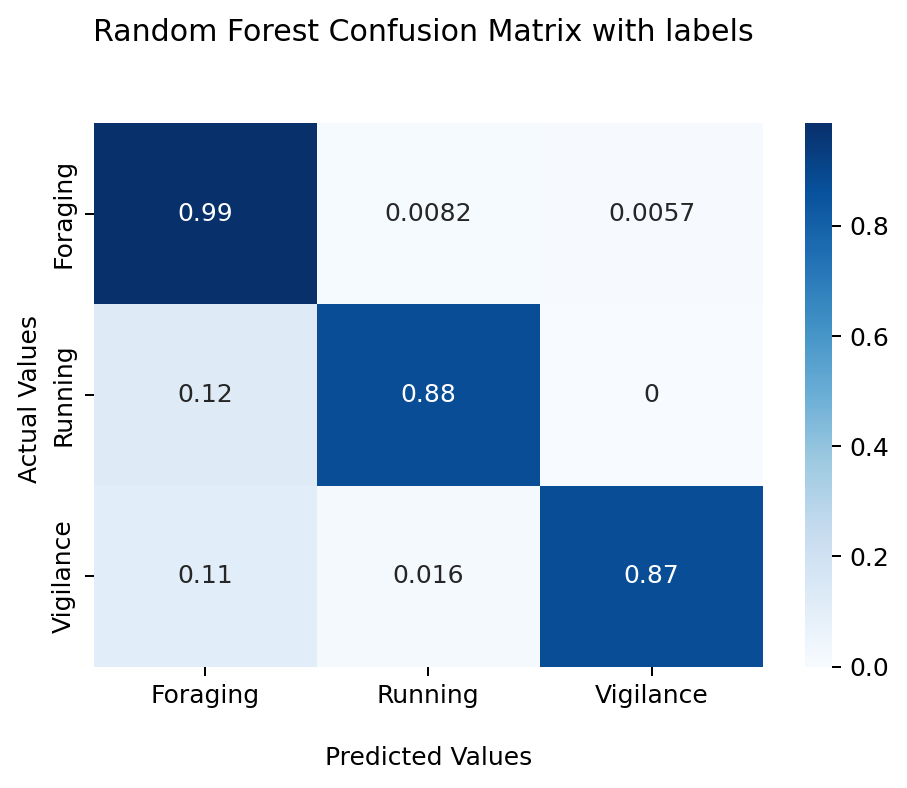

              precision    recall  f1-score   support

    Foraging       0.97      0.99      0.98      1589
     Running       0.53      0.88      0.66        24
   Vigilance       0.97      0.87      0.92       367

    accuracy                           0.96      1980
   macro avg       0.82      0.91      0.85      1980
weighted avg       0.97      0.96      0.96      1980



In [66]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix,classification_report
from sklearn.decomposition import PCA

df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA','StdNorm'],axis=1,inplace=True)
#'Max_VeDBA','Min_VeDBA',
df_GPS_RUNNING = df_copy[df_copy['Behavior']=='RunningGPS']
df_GPS_RUNNING.loc[:,'Behavior'] = 'Running'

df_RUNNING =  df_copy[df_copy['Behavior']=='Running']

df_copy = df_copy[df_copy['Behavior']!='RunningGPS']
df_copy = df_copy[df_copy['Behavior']!='Running']
df_copy = df_copy[df_copy['Behavior']!='Others']

x=df_copy.iloc[:,4:]  # Features
#x=df.iloc[:,4:]  # Features

y=df_copy['Behavior'].values  # Labels


Scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35,random_state=42) # 80% training and 20% test



clf=RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)


X_train =  np.concatenate((X_train, df_GPS_RUNNING.iloc[:,4:].to_numpy()), axis = 0)
y_train = np.concatenate([y_train,df_GPS_RUNNING['Behavior'].to_numpy()],axis=0)


X_test =  np.concatenate((X_test, df_RUNNING.iloc[:,4:].to_numpy()), axis = 0)
y_test = np.concatenate([y_test,df_RUNNING['Behavior'].to_numpy()],axis=0)

X_train = Scaler.fit_transform(X_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(dpi=180)
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Random Forest Confusion Matrix with labels \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(np.unique(y_train)))
ax.yaxis.set_ticklabels(sorted(np.unique(y_train)))
#plt.tight_layout()
plt.show()


print(classification_report(y_test, y_pred))

In [122]:
from sklearn.pipeline import make_pipeline

import joblib


pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42) )

pipeline.fit(X_train, y_train)
print(classification_report(y_test,pipeline.predict(X_test)))

pipeline.fit(x, y)
joblib.dump(pipeline, '/media/amlan/Data/Thesis Data/Processed Data/RF_model.mod') 

              precision    recall  f1-score   support

    Foraging       0.97      0.99      0.98      1143
     Running       0.63      0.92      0.75        24
   Vigilance       0.96      0.87      0.91       267

    accuracy                           0.96      1434
   macro avg       0.85      0.92      0.88      1434
weighted avg       0.96      0.96      0.96      1434



['/media/amlan/Data/Thesis Data/Processed Data/RF_model.mod']

Leave One Out Analysis For Group

Accuracy: 0.9824


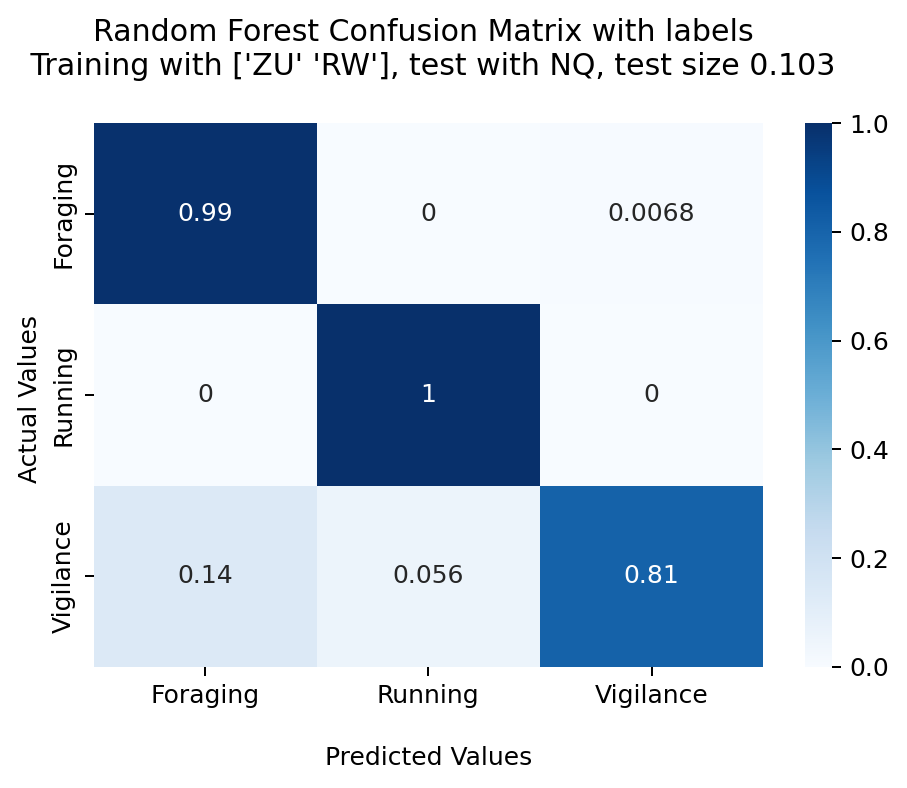

Accuracy: 0.9528565721134639


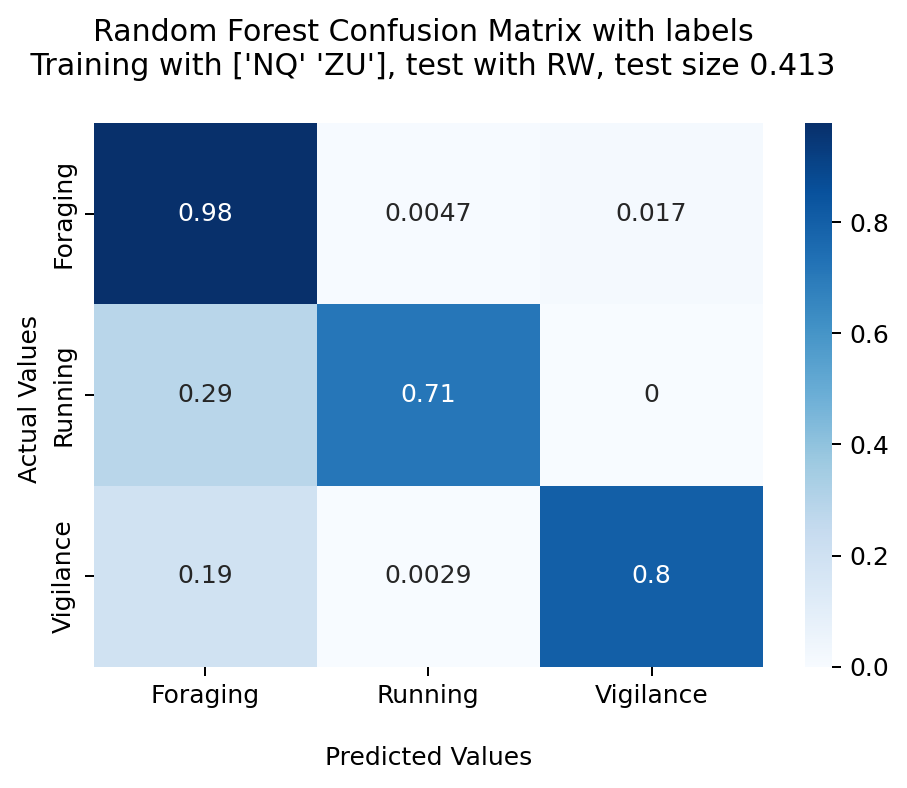

Accuracy: 0.9625453080950463


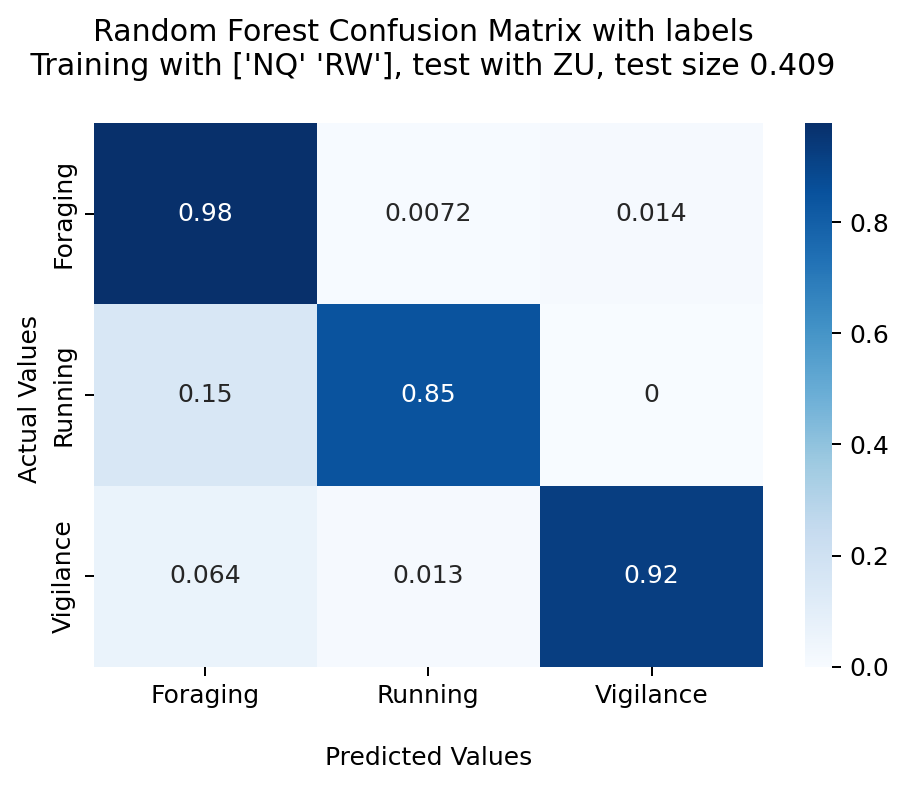

In [75]:
df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA','StdNorm'],axis=1,inplace=True)
#'Max_VeDBA','Min_VeDBA',

#df_copy = df_copy[df_copy['Behavior']!='Running']
df_copy = df_copy[df_copy['Behavior']!='Others']
for key,value in df_copy.groupby('Group'):
    
    test_proportion = np.round(value.shape[0]/df_copy.shape[0],3)

    train_data = df_copy.drop(value.index)
    train_data = train_data[train_data['Behavior']!='Running']
    train_data.loc[train_data['Behavior']=='RunningGPS','Behavior'] = 'Running'
    x=train_data.iloc[:,4:]  # Features
    y=train_data['Behavior'].values # Labels

    Scaler = StandardScaler()
    clf=RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)


    x = Scaler.fit_transform(x)
    clf.fit(x,y)
    
    value = value[value['Behavior']!='RunningGPS']
    X_test = value.iloc[:,4:]
    y_test =  value['Behavior'].values
    X_test = Scaler.transform(X_test)
    y_pred=clf.predict(X_test)

    print("Accuracy:",accuracy_score(y_test, y_pred))

    plt.figure(dpi=180)
    cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    test_proportion = np.round(X_test.shape[0]/df_copy.shape[0],3)

    ax.set_title('Random Forest Confusion Matrix with labels \n Training with {}, test with {}, test size {}\n'.format(train_data['Group'].unique(),key,test_proportion))
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(sorted(np.unique(y)))
    ax.yaxis.set_ticklabels(sorted(np.unique(y)))
    #plt.tight_layout()
    plt.show()

Leave One Out Analysis Individual

Accuracy: 0.9853211009174312


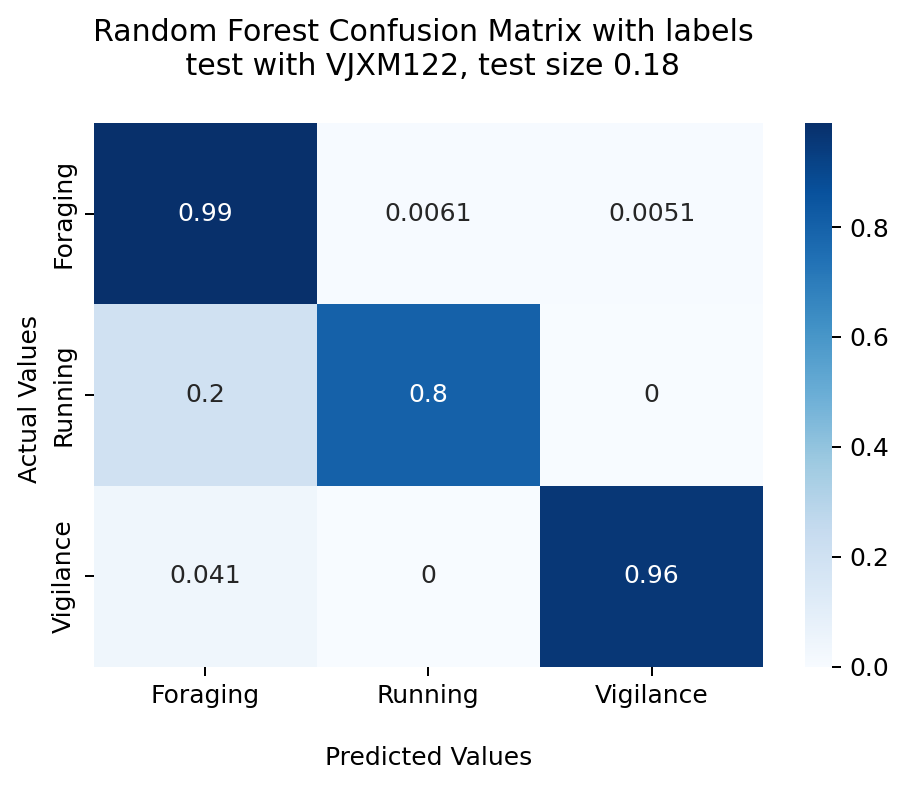

Accuracy: 0.9889705882352942


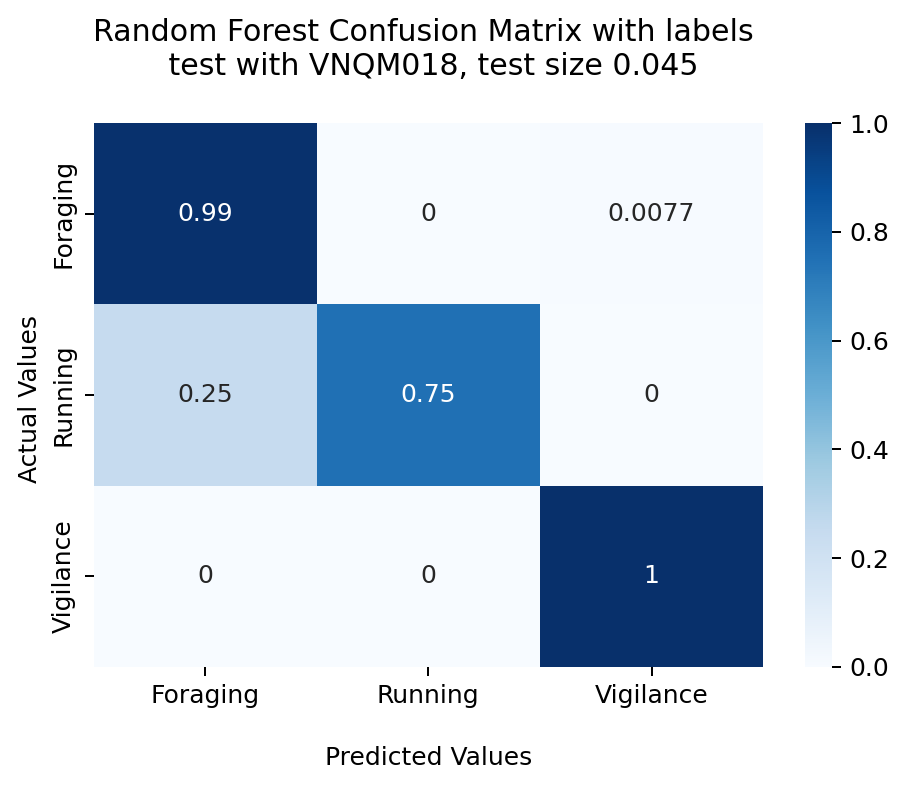

Accuracy: 0.8588709677419355


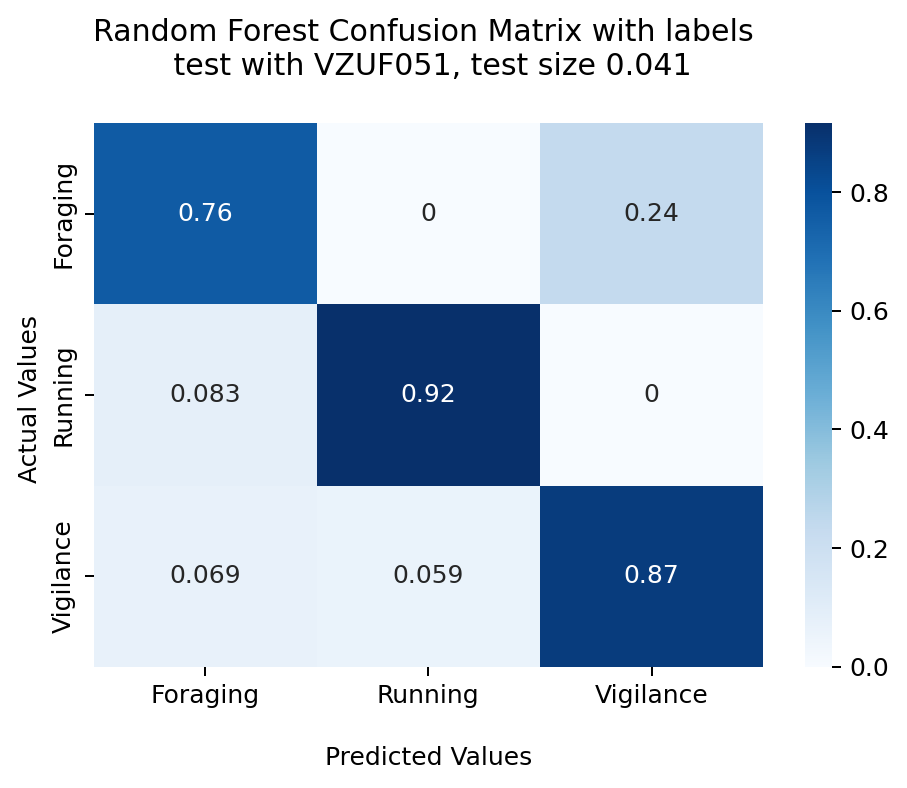

In [76]:
df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA','StdNorm'],axis=1,inplace=True)
#'Max_VeDBA','Min_VeDBA',

#df_copy = df_copy[df_copy['Behavior']!='Running']
df_copy = df_copy[df_copy['Behavior']!='Others']
for key,value in df_copy.groupby('Individual'):
    if key in ['VNQM018','VJXM122','VZUF051']:
        test_proportion = np.round(value.shape[0]/df_copy.shape[0],3)

        train_data = df_copy.drop(value.index)
        train_data = train_data[train_data['Behavior']!='Running']
        train_data.loc[train_data['Behavior']=='RunningGPS','Behavior'] = 'Running'
        x=train_data.iloc[:,4:]  # Features
        y=train_data['Behavior'].values # Labels

        Scaler = StandardScaler()
        clf=RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)


        x = Scaler.fit_transform(x)
        clf.fit(x,y)
        
        value = value[value['Behavior']!='RunningGPS']
        X_test = value.iloc[:,4:]
        y_test =  value['Behavior'].values
        X_test = Scaler.transform(X_test)
        y_pred=clf.predict(X_test)

        print("Accuracy:",accuracy_score(y_test, y_pred))

        plt.figure(dpi=180)
        cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        test_proportion = np.round(X_test.shape[0]/df_copy.shape[0],3)

        ax.set_title('Random Forest Confusion Matrix with labels \n test with {}, test size {}\n'.format(key,test_proportion))
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');

        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(sorted(np.unique(y)))
        ax.yaxis.set_ticklabels(sorted(np.unique(y)))
        #plt.tight_layout()
        plt.show()
    else:
        pass

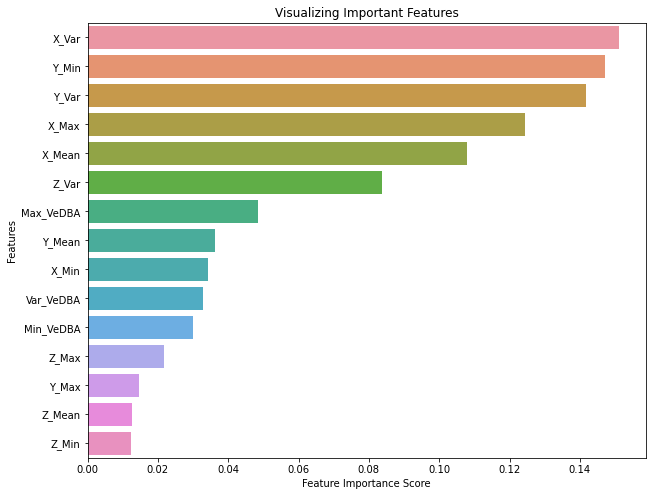

In [77]:
plt.figure(figsize=(10,8))
feature_imp = pd.Series(clf.feature_importances_,index=df_copy.iloc[:,4:].columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

# Random Forest With Stratified Kfold

In [17]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.metrics import confusion_matrix,classification_report,f1_score,balanced_accuracy_score
from sklearn.decomposition import PCA

df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA'],axis=1,inplace=True)
#,,'Max_VeDBA','Log VeDBA','Min_VeDBA','Var_VeDBA'
#df_copy = df_copy[df_copy['Behavior']!='Running']
df_copy = df_copy[df_copy['Behavior']!='Others']
#df_copy.loc[df_copy['Behavior'] == 'RunningGPS','Behavior'] = 'Running'

df_copy.reset_index(inplace=True,drop=True)


x=df_copy.iloc[:,4:]  # Features


y=df_copy['Behavior']  # Labels



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 

f1_accu_stratified = []
balanced_accu_stratified = []



for train_index, test_index in skf.split(x, y): 
    X_train_fold, X_test_fold = x.loc[train_index], x.loc[test_index]
    Scaler = StandardScaler()
    
    X_train_fold = Scaler.fit_transform(X_train_fold)
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    
    model = RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)
    model.fit(X_train_fold, y_train_fold) 
    
    X_test_fold = Scaler.transform(X_test_fold)
    y_pred_fold=model.predict(X_test_fold)
    
    balanced_accu_stratified.append(balanced_accuracy_score(y_test_fold, y_pred_fold))
    f1_accu_stratified.append(f1_score(y_test_fold, y_pred_fold, average='macro'))
    
    
    print("Accuracy:",accuracy_score(y_test_fold, y_pred_fold))
    print(classification_report(y_test_fold, y_pred_fold))
    print('---------')
    print('\n')



print('Overall F1:',np.mean(f1_accu_stratified))
print('Overall balanced Accuracy:',np.mean(balanced_accu_stratified))


Accuracy: 0.9574816026165167
              precision    recall  f1-score   support

    Foraging       0.97      0.98      0.98       916
     Running       0.00      0.00      0.00         5
  RunningGPS       0.89      0.90      0.90        90
   Vigilance       0.94      0.89      0.91       212

    accuracy                           0.96      1223
   macro avg       0.70      0.69      0.70      1223
weighted avg       0.95      0.96      0.96      1223

---------




/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.955846279640229
              precision    recall  f1-score   support

    Foraging       0.97      0.98      0.97       916
     Running       0.00      0.00      0.00         5
  RunningGPS       0.88      0.88      0.88        90
   Vigilance       0.94      0.90      0.92       212

    accuracy                           0.96      1223
   macro avg       0.70      0.69      0.69      1223
weighted avg       0.95      0.96      0.95      1223

---------




/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9501226492232215
              precision    recall  f1-score   support

    Foraging       0.96      0.98      0.97       916
     Running       0.00      0.00      0.00         4
  RunningGPS       0.85      0.84      0.84        91
   Vigilance       0.94      0.89      0.91       212

    accuracy                           0.95      1223
   macro avg       0.69      0.68      0.68      1223
weighted avg       0.95      0.95      0.95      1223

---------




/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amlan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9599345870809485
              precision    recall  f1-score   support

    Foraging       0.96      0.99      0.97       915
     Running       1.00      0.20      0.33         5
  RunningGPS       0.91      0.87      0.89        91
   Vigilance       0.96      0.91      0.93       212

    accuracy                           0.96      1223
   macro avg       0.96      0.74      0.78      1223
weighted avg       0.96      0.96      0.96      1223

---------


Accuracy: 0.9550286181520851
              precision    recall  f1-score   support

    Foraging       0.96      0.99      0.97       916
     Running       1.00      0.20      0.33         5
  RunningGPS       0.90      0.88      0.89        91
   Vigilance       0.96      0.87      0.91       211

    accuracy                           0.96      1223
   macro avg       0.96      0.73      0.78      1223
weighted avg       0.96      0.96      0.95      1223

---------


Overall F1: 0.7259197727500445
Overall balanced 



# Outlier Removal

IQR

In [20]:
df_copy = df.copy()

indices = []    
for key,value in df_copy[['Behavior','Log VeDBA']].groupby('Behavior'):
    Q1 = value['Log VeDBA'].quantile(0.25)
    Q3 = value['Log VeDBA'].quantile(0.75)
    IQR = Q3-Q1
    values = value[~((value['Log VeDBA']<(Q1-1.5*IQR)) | (value['Log VeDBA']>(Q3+1.5*IQR)))].index
    for i in values:
        indices.append(i)
df_copy.loc[df_copy['Behavior'] == 'RunningGPS','Behavior'] = 'Running'    
df_copy2 = df_copy.loc[indices]

Accuracy: 0.9473684210526315


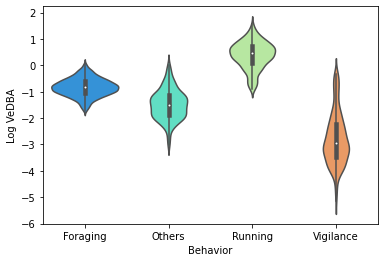

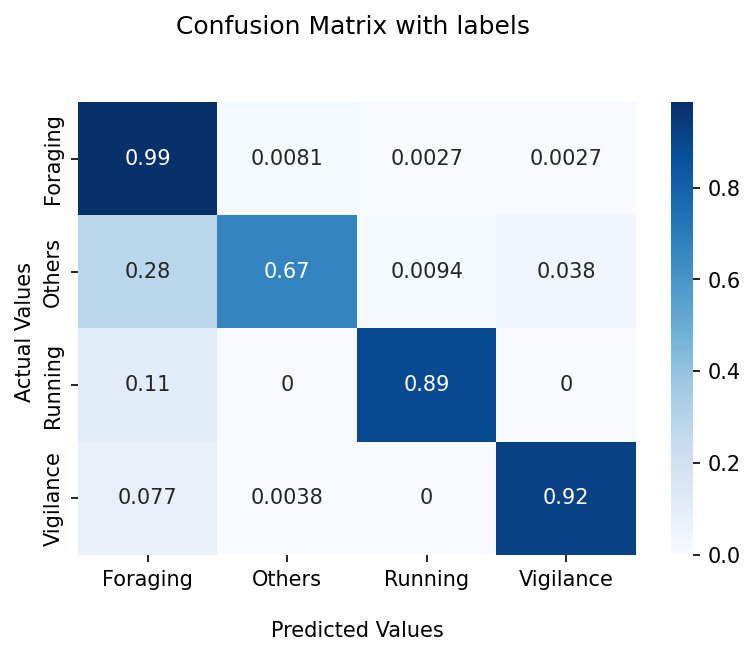

              precision    recall  f1-score   support

    Foraging       0.95      0.99      0.97      1114
      Others       0.88      0.67      0.76       106
     Running       0.96      0.89      0.92       116
   Vigilance       0.97      0.92      0.94       260

    accuracy                           0.95      1596
   macro avg       0.94      0.87      0.90      1596
weighted avg       0.95      0.95      0.95      1596



In [22]:
import seaborn as sns

fig,ax = plt.subplots()
sns.violinplot(x='Behavior',y='Log VeDBA',data=df_copy2[['Behavior','Log VeDBA']], palette='rainbow',showfliers=False)
#plt.title("VeDBA Distribution Across Behavior")

x=df_copy2.iloc[:,4:]  # Features
#x=df.iloc[:,4:]  # Features

y=df_copy2['Behavior']  # Labels


Scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)


X_train = Scaler.fit_transform(X_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(dpi=150)
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
#plt.tight_layout()
plt.show()

y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

SMOTE RF

Accuracy: 0.9599345870809485


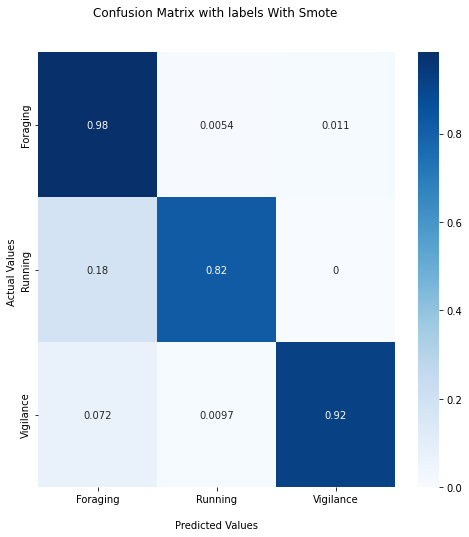

              precision    recall  f1-score   support

    Foraging       0.97      0.98      0.97       922
     Running       0.92      0.82      0.87        94
   Vigilance       0.95      0.92      0.93       207

    accuracy                           0.96      1223
   macro avg       0.94      0.91      0.92      1223
weighted avg       0.96      0.96      0.96      1223



In [23]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()


df_copy = df.copy()
df_copy.drop(['Axy','Max_VeDBA','Log VeDBA','Min_VeDBA','Var_VeDBA'],axis=1,inplace=True)
df_copy = df_copy[df_copy['Behavior']!='Others']
df_copy.loc[df_copy['Behavior'] == 'RunningGPS','Behavior'] = 'Running'

df_copy.reset_index(inplace=True,drop=True)


x=df_copy.iloc[:,4:]  # Features


y=df_copy['Behavior']  # Labels

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

clf=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)


X_train = Scaler.fit_transform(X_train)


X_train, y_train = oversample.fit_resample(X_train, y_train)

clf.fit(X_train,y_train)


X_test = Scaler.transform(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,8))
cf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels With Smote \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(sorted(y.unique()))
ax.yaxis.set_ticklabels(sorted(y.unique()))
plt.show()

y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

XGB

In [24]:
from sklearn.ensemble import GradientBoostingClassifier


df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA'],axis=1,inplace=True)
#,,'Max_VeDBA','Log VeDBA','Min_VeDBA','Var_VeDBA'
#df_copy = df_copy[df_copy['Behavior']!='Running']
df_copy = df_copy[df_copy['Behavior']!='Others']
df_copy.loc[df_copy['Behavior'] == 'RunningGPS','Behavior'] = 'Running'

df_copy.reset_index(inplace=True,drop=True)


x=df_copy.iloc[:,4:]  # Features


y=df_copy['Behavior']  # Labels



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 

f1_accu_stratified = []
balanced_accu_stratified = []



for train_index, test_index in skf.split(x, y): 
    X_train_fold, X_test_fold = x.loc[train_index], x.loc[test_index]
    Scaler = StandardScaler()
    
    X_train_fold = Scaler.fit_transform(X_train_fold)
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    
    model = GradientBoostingClassifier()
    model.fit(X_train_fold, y_train_fold) 
    
    X_test_fold = Scaler.transform(X_test_fold)
    y_pred_fold=model.predict(X_test_fold)
    
    balanced_accu_stratified.append(balanced_accuracy_score(y_test_fold, y_pred_fold))
    f1_accu_stratified.append(f1_score(y_test_fold, y_pred_fold, average='macro'))
    
    
    print("Accuracy:",accuracy_score(y_test_fold, y_pred_fold))
    print(classification_report(y_test_fold, y_pred_fold))
    print('---------')
    print('\n')



print('Overall F1:',np.mean(f1_accu_stratified))
print('Overall balanced Accuracy:',np.mean(balanced_accu_stratified))


NameError: name 'StratifiedKFold' is not defined

SVM

In [94]:
df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA'],axis=1,inplace=True)
df_copy = df_copy.loc[df_copy['Behavior']!='Running']
df_copy.loc[df_copy['Behavior'] == 'RunningGPS','Behavior'] = 'Running'
df_copy = df_copy.loc[df_copy['Behavior']!='Others']

df_copy.reset_index(inplace=True,drop=True)


x=df_copy.iloc[:,4:]  # Features


y=df_copy['Behavior']  # Labels



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 

f1_accu_stratified = []
balanced_accu_stratified = []



for train_index, test_index in skf.split(x, y): 
    X_train_fold, X_test_fold = x.loc[train_index], x.loc[test_index]
    Scaler = StandardScaler()
    
    X_train_fold = Scaler.fit_transform(X_train_fold)
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    
    model = SVC(kernel='linear', gamma='scale')
    model.fit(X_train_fold, y_train_fold) 
    
    X_test_fold = Scaler.transform(X_test_fold)
    y_pred_fold=model.predict(X_test_fold)
    
    balanced_accu_stratified.append(balanced_accuracy_score(y_test_fold, y_pred_fold))
    f1_accu_stratified.append(f1_score(y_test_fold, y_pred_fold, average='macro'))
    
    
    print("Accuracy:",accuracy_score(y_test_fold, y_pred_fold))
    print(classification_report(y_test_fold, y_pred_fold))
    print('---------')
    print('\n')



print('Overall F1:',np.mean(f1_accu_stratified))
print('Overall balanced Accuracy:',np.mean(balanced_accu_stratified))




Accuracy: 0.9548069022185702
              precision    recall  f1-score   support

    Foraging       0.96      0.99      0.97       915
     Running       0.96      0.78      0.86        90
   Vigilance       0.94      0.89      0.92       212

    accuracy                           0.95      1217
   macro avg       0.95      0.89      0.92      1217
weighted avg       0.95      0.95      0.95      1217

---------


Accuracy: 0.9589153656532456
              precision    recall  f1-score   support

    Foraging       0.97      0.98      0.97       914
     Running       0.99      0.86      0.92        91
   Vigilance       0.91      0.91      0.91       212

    accuracy                           0.96      1217
   macro avg       0.95      0.92      0.93      1217
weighted avg       0.96      0.96      0.96      1217

---------


Accuracy: 0.9498767460969597
              precision    recall  f1-score   support

    Foraging       0.96      0.98      0.97       914
     Running      

KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier


df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA'],axis=1,inplace=True)
df_copy = df_copy.loc[df_copy['Behavior']!='Running']
df_copy.loc[df_copy['Behavior'] == 'RunningGPS','Behavior'] = 'Running'
df_copy = df_copy.loc[df_copy['Behavior']!='Others']

df_copy.reset_index(inplace=True,drop=True)


x=df_copy.iloc[:,4:]  # Features


y=df_copy['Behavior']  # Labels



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 

f1_accu_stratified = []
balanced_accu_stratified = []



for train_index, test_index in skf.split(x, y): 
    X_train_fold, X_test_fold = x.loc[train_index], x.loc[test_index]
    Scaler = StandardScaler()
    
    X_train_fold = Scaler.fit_transform(X_train_fold)
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    
    model = KNeighborsClassifier(n_neighbors=15)
    model.fit(X_train_fold, y_train_fold) 
    
    X_test_fold = Scaler.transform(X_test_fold)
    y_pred_fold=model.predict(X_test_fold)
    
    balanced_accu_stratified.append(balanced_accuracy_score(y_test_fold, y_pred_fold))
    f1_accu_stratified.append(f1_score(y_test_fold, y_pred_fold, average='macro'))
    
    
    print("Accuracy:",accuracy_score(y_test_fold, y_pred_fold))
    print(classification_report(y_test_fold, y_pred_fold))
    print('---------')
    print('\n')



print('Overall F1:',np.mean(f1_accu_stratified))
print('Overall balanced Accuracy:',np.mean(balanced_accu_stratified))


Accuracy: 0.952341824157765
              precision    recall  f1-score   support

    Foraging       0.95      0.99      0.97       915
     Running       0.91      0.80      0.85        90
   Vigilance       0.96      0.87      0.91       212

    accuracy                           0.95      1217
   macro avg       0.94      0.88      0.91      1217
weighted avg       0.95      0.95      0.95      1217

---------


Accuracy: 0.9572719802793755
              precision    recall  f1-score   support

    Foraging       0.97      0.98      0.97       914
     Running       0.93      0.88      0.90        91
   Vigilance       0.92      0.90      0.91       212

    accuracy                           0.96      1217
   macro avg       0.94      0.92      0.93      1217
weighted avg       0.96      0.96      0.96      1217

---------


Accuracy: 0.9449465899753492
              precision    recall  f1-score   support

    Foraging       0.96      0.97      0.97       914
     Running       

ALL

In [104]:
df_copy = df.copy()
df_copy.drop(['Axy','Log VeDBA'],axis=1,inplace=True)
df_copy = df_copy.loc[df_copy['Behavior']!='Running']
df_copy.loc[df_copy['Behavior'] == 'RunningGPS','Behavior'] = 'Running'
df_copy = df_copy.loc[df_copy['Behavior']!='Others']

df_copy.reset_index(inplace=True,drop=True)


x=df_copy.iloc[:,4:]  # Features


y=df_copy['Behavior']  # Labels



Scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

Models = [RandomForestClassifier(),KNeighborsClassifier(),SVC(),GradientBoostingClassifier()]

for clf in Models:

    print(clf)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
    f1_accu_stratified = []
    balanced_accu_stratified = []



    for train_index, test_index in skf.split(x, y): 
        X_train_fold, X_test_fold = x.loc[train_index], x.loc[test_index]
        Scaler = StandardScaler()

        X_train_fold = Scaler.fit_transform(X_train_fold)
        y_train_fold, y_test_fold = y[train_index], y[test_index] 

        model = clf
        model.fit(X_train_fold, y_train_fold) 

        X_test_fold = Scaler.transform(X_test_fold)
        y_pred_fold=model.predict(X_test_fold)

        balanced_accu_stratified.append(balanced_accuracy_score(y_test_fold, y_pred_fold))
        f1_accu_stratified.append(f1_score(y_test_fold, y_pred_fold, average='macro'))


        
        print(classification_report(y_test_fold, y_pred_fold))

    print('Overall F1:',np.mean(f1_accu_stratified))
    print('Overall balanced Accuracy:',np.mean(balanced_accu_stratified))

    print('\n')

RandomForestClassifier()
              precision    recall  f1-score   support

    Foraging       0.96      0.99      0.98       915
     Running       0.94      0.83      0.88        90
   Vigilance       0.97      0.88      0.93       212

    accuracy                           0.96      1217
   macro avg       0.96      0.90      0.93      1217
weighted avg       0.96      0.96      0.96      1217

              precision    recall  f1-score   support

    Foraging       0.97      0.99      0.98       914
     Running       0.97      0.92      0.94        91
   Vigilance       0.95      0.90      0.92       212

    accuracy                           0.97      1217
   macro avg       0.96      0.94      0.95      1217
weighted avg       0.97      0.97      0.97      1217

              precision    recall  f1-score   support

    Foraging       0.96      0.98      0.97       914
     Running       0.87      0.82      0.85        91
   Vigilance       0.94      0.89      0.92       

Recursive Feature Elimination

Optimal number of features : 13


/home/amlan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


ValueError: x and y must have same first dimension, but have shapes (6,) and (16, 4)

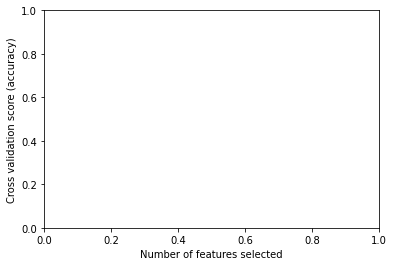

In [147]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features

df_copy = df.copy()
df_copy.drop(['Axy','StdNorm'],axis=1,inplace=True)
#df_copy = df_copy[df_copy['Behavior']!='Others']
#df_copy = df_copy[~((df_copy['Behavior']=='Running') & (df_copy['Log VeDBA']<-1))]
x=df_copy.iloc[:,4:].to_numpy()  # Features


y=df_copy['Behavior']  # Labels



# Create the RFE object and compute a cross-validated score.
svc = RandomForestClassifier()
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(4),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

# Behavioral Transition

In [748]:
df['shift'] = df['Behavior'].shift(-1)
a = df.loc[:,['Behavior','shift']]
df.drop(['shift'],axis=1,inplace=True)
a = a[a['Behavior']!=a['shift']]
a['count'] = 1
print(a.groupby(['Behavior','shift']).count().unstack().fillna(0))

             count                                    
shift     Foraging Others Running RunningGPS Vigilance
Behavior                                              
Foraging       0.0   15.0     5.0        0.0      75.0
Others        14.0    0.0     0.0        1.0       6.0
Running        5.0    0.0     0.0        0.0      11.0
Vigilance     76.0    6.0    11.0        0.0       0.0
